### 星座vs勝負預測

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# 讀取資料集
data = pd.read_csv("win_lose_signs.csv")

# 篩掉平手
data = data[data['status'] != 'a draw']
data

,match_api_id,team_api_id,team_type,spread,status,fire,water,earth,air,Aries,...,Sagittarius,Cancer,Scopio,Pisces,Taurus,Virgo,Capricorn,Gemini,Libra,Aquarius
0,483130,9827,home,1,win,2,3,4,2,2,...,0,2,0,1,1,1,2,1,1,0
1,483130,7819,home,1,lose,4,4,1,2,1,...,1,1,0,3,0,0,1,0,1,1
2,483131,9746,home,1,win,2,4,3,2,2,...,0,2,2,0,1,1,1,0,0,2
3,483131,9831,home,1,lose,2,1,5,3,0,...,1,1,0,0,2,2,1,1,0,2
4,483133,9748,home,3,win,7,0,2,2,2,...,4,0,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42743,2216667,8284,home,4,lose,4,4,0,3,1,...,1,0,1,3,0,0,0,0,1,2
42744,2216670,8649,away,4,win,2,3,1,5,1,...,0,1,0,2,0,0,1,1,2,2
42745,2216670,8485,away,4,lose,3,5,2,1,2,...,0,2,2,1,0,1,1,0,0,1
42746,2216671,9925,home,7,win,3,0,2,6,1,...,2,0,0,0,0,0,2,2,2,2


#### XGboost

##### 模型

In [6]:
# 初始化 LabelEncoder
label_encoder = LabelEncoder()

# 將字符串類別標籤轉換為整數類別標籤
data['status_encoded'] = label_encoder.fit_transform(data['status'])

In [7]:
# 特徵選擇：假設星座是特徵，比賽結果是標籤
features = data[["Aries", "Leo", "Sagittarius", "Cancer", "Scopio", "Pisces", "Taurus", "Virgo", "Capricorn", "Gemini", "Libra", "Aquarius"]]
labels = data["status_encoded"]

# 將數據集分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=21)

# 初始化XGBoost分類器
model = XGBClassifier()

# 訓練模型
model.fit(X_train, y_train)

# 在測試集上進行預測
y_pred = model.predict(X_test)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f"模型準確率: {accuracy:.2f}")

# 顯示更多評估指標
print(classification_report(y_test, y_pred))

模型準確率: 0.53
              precision    recall  f1-score   support

           0       0.54      0.53      0.53      3236
           1       0.53      0.54      0.53      3155

    accuracy                           0.53      6391
   macro avg       0.53      0.53      0.53      6391
weighted avg       0.53      0.53      0.53      6391



##### 調整參數

In [4]:
# 1. 調整參數
# 使用GridSearchCV或RandomizedSearchCV等技術進行參數調整，優化模型性能。
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200],
}

grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

KeyboardInterrupt: 

In [6]:
# 使用最佳參數的模型進行預測
y_pred = best_model.predict(X_test)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f"最佳模型準確率: {accuracy:.2f}")

# 顯示更多評估指標
print(classification_report(y_test, y_pred))

最佳模型準確率: 0.53
              precision    recall  f1-score   support

           0       0.52      0.54      0.53      3176
           1       0.53      0.52      0.52      3215

    accuracy                           0.53      6391
   macro avg       0.53      0.53      0.53      6391
weighted avg       0.53      0.53      0.53      6391



##### 驗證

混淆矩陣:
 [[1699 1537]
 [1449 1706]]


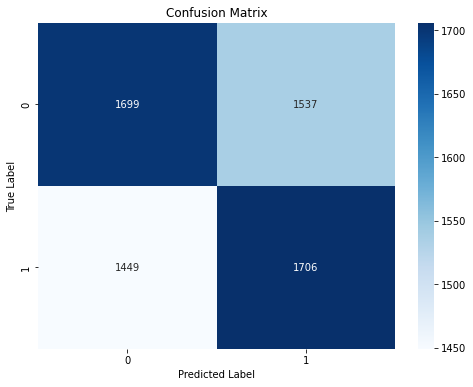

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# 混淆矩陣
# 深入了解模型在不同類別上的表現。
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("混淆矩陣:\n", conf_matrix)

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


              precision    recall  f1-score   support

           0       0.54      0.53      0.53      3236
           1       0.53      0.54      0.53      3155

    accuracy                           0.53      6391
   macro avg       0.53      0.53      0.53      6391
weighted avg       0.53      0.53      0.53      6391



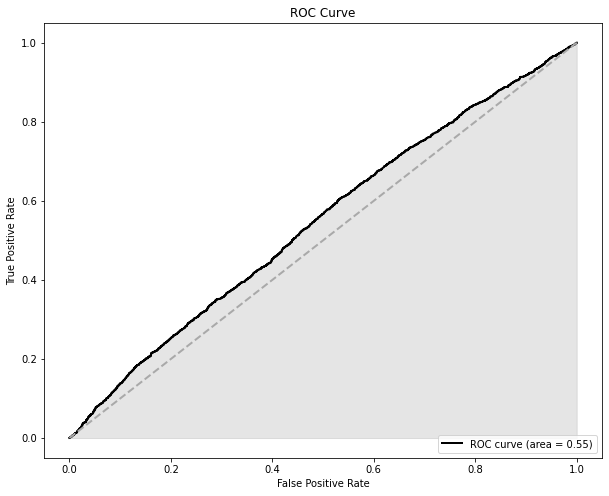

In [9]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# 顯示更多評估指標
print(classification_report(y_test, y_pred))

# 繪製ROC曲線
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Cutoff rate
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# 畫圖
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='black', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.fill_between(fpr, tpr, step='post', alpha = 0.2, color='gray')
plt.plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

        Feature  Importance
10        Libra    0.089865
3        Cancer    0.086362
4        Scopio    0.086240
1           Leo    0.086066
11     Aquarius    0.085638
8     Capricorn    0.085013
6        Taurus    0.082503
7         Virgo    0.081546
2   Sagittarius    0.079785
9        Gemini    0.079217
5        Pisces    0.079025
0         Aries    0.078741


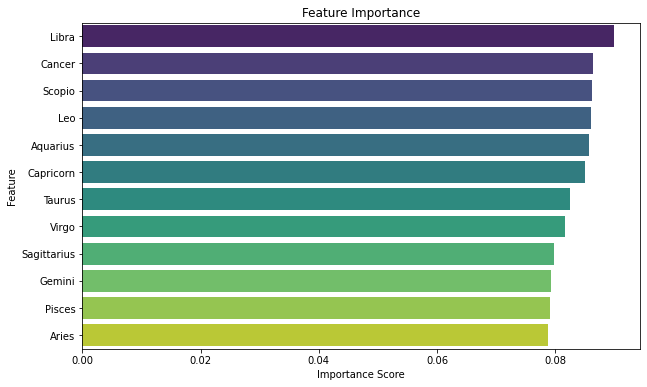

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 特徵重要性
feature_importance = model.feature_importances_

# 特徵名稱
feature_names = features.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# 按照重要性得分排序
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
# 畫圖
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, hue='Feature', palette='viridis', dodge=False, legend=False)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


#### 羅吉斯回歸

In [2]:
# 羅吉斯回歸
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer

# 特徵選擇：假設星座是特徵，比賽結果是標籤
features = data[["Aries", "Leo", "Sagittarius", "Cancer", "Scopio", "Pisces", "Taurus", "Virgo", "Capricorn", "Gemini", "Libra", "Aquarius"]]
labels = data["status"]

# 將標籤轉換為二元數字
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(labels).ravel()

# 將數據集分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=21)

# 初始化羅吉斯回歸模型
model = LogisticRegression()

# 訓練模型
model.fit(X_train, y_train)

# 在測試集上進行預測
y_pred = model.predict(X_test)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f"模型準確率: {accuracy:.2f}")

# 顯示更多評估指標
print(classification_report(y_test, y_pred))

模型準確率: 0.51
              precision    recall  f1-score   support

           0       0.52      0.47      0.49      3236
           1       0.50      0.56      0.53      3155

    accuracy                           0.51      6391
   macro avg       0.51      0.51      0.51      6391
weighted avg       0.51      0.51      0.51      6391



              precision    recall  f1-score   support

           0       0.52      0.47      0.49      3236
           1       0.50      0.56      0.53      3155

    accuracy                           0.51      6391
   macro avg       0.51      0.51      0.51      6391
weighted avg       0.51      0.51      0.51      6391



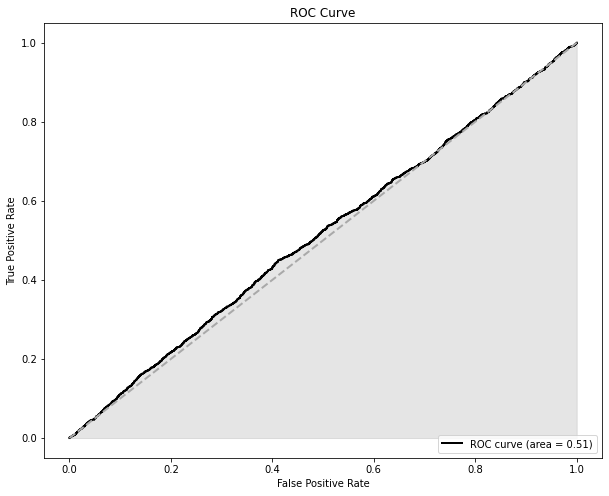

In [4]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# 顯示更多評估指標
print(classification_report(y_test, y_pred))

# 繪製ROC曲線
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Cutoff rate
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='black', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.fill_between(fpr, tpr, step='post', alpha = 0.2, color='gray')
plt.plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

        Feature  Importance
8     Capricorn    0.035507
11     Aquarius    0.022588
7         Virgo    0.021967
3        Cancer    0.017818
2   Sagittarius    0.007513
0         Aries    0.002903
6        Taurus    0.000264
5        Pisces   -0.010975
1           Leo   -0.013039
9        Gemini   -0.013168
4        Scopio   -0.025728
10        Libra   -0.046069


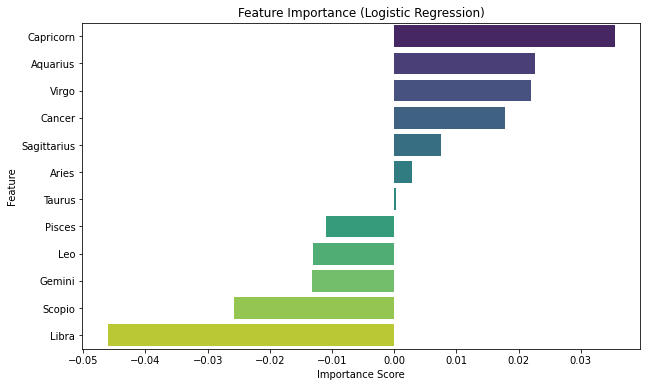

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 特徵重要性
feature_importance = model.coef_[0]

# 特徵名稱
feature_names = features.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# 按照重要性得分排序
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 畫圖
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, hue='Feature', palette='viridis', dodge=False, legend=False)
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

混淆矩陣:
 [[1508 1728]
 [1397 1758]]


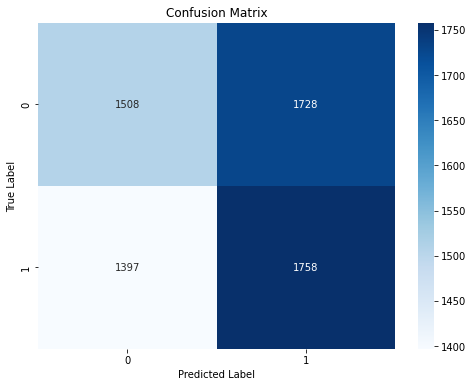

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
# 混淆矩陣
# 深入了解模型在不同類別上的表現。
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("混淆矩陣:\n", conf_matrix)

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 星象 vs 勝負

#### XGBoost

##### 模型

In [27]:
# 初始化 LabelEncoder
label_encoder = LabelEncoder()

# 將字符串類別標籤轉換為整數類別標籤
data['status_encoded'] = label_encoder.fit_transform(data['status'])

In [28]:
# 特徵選擇：假設星座是我們的特徵，比賽結果是我們的標籤
features = data[["fire", "water", "earth", "air"]]
labels = data["status_encoded"]

# 將數據集分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=21)

# 初始化XGBoost分類器
model = XGBClassifier()

# 訓練模型
model.fit(X_train, y_train)

# 在測試集上進行預測
y_pred = model.predict(X_test)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f"模型準確率: {accuracy:.2f}")

# 顯示更多評估指標
print(classification_report(y_test, y_pred))

模型準確率: 0.51
              precision    recall  f1-score   support

           0       0.51      0.44      0.48      3236
           1       0.50      0.57      0.53      3155

    accuracy                           0.51      6391
   macro avg       0.51      0.51      0.50      6391
weighted avg       0.51      0.51      0.50      6391



##### 驗證

In [29]:
# 觀察混淆矩陣
# 深入了解模型在不同類別上的表現。
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("混淆矩陣:\n", conf_matrix)

混淆矩陣:
 [[1435 1801]
 [1353 1802]]


              precision    recall  f1-score   support

           0       0.51      0.44      0.48      3236
           1       0.50      0.57      0.53      3155

    accuracy                           0.51      6391
   macro avg       0.51      0.51      0.50      6391
weighted avg       0.51      0.51      0.50      6391



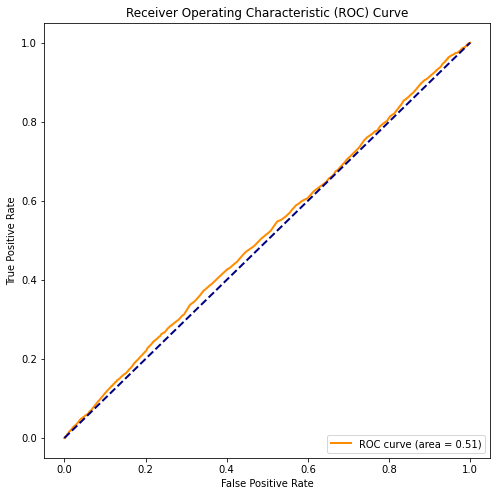

In [30]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# 顯示更多評估指標
print(classification_report(y_test, y_pred))

# 繪製ROC曲線
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

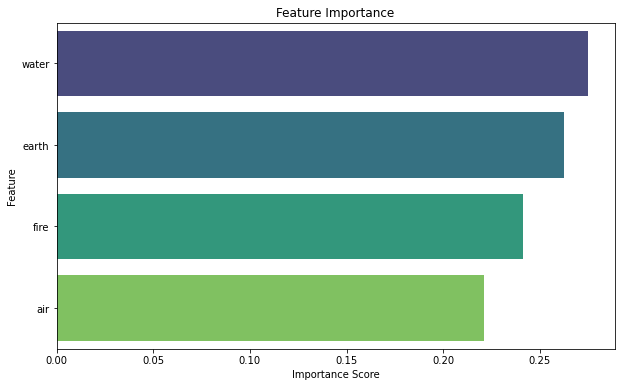

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 特徵重要性
feature_importance = model.feature_importances_

# 特徵名稱
feature_names = features.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# 按照重要性得分排序
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 畫圖
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, hue='Feature', palette='viridis', dodge=False, legend=False)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

#### 羅吉斯回歸

In [35]:
# 羅吉斯回歸
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer

# 特徵選擇：假設星座是特徵，比賽結果是標籤
features = data[["fire", "water", "earth", "air"]]
labels = data["status"]

# 將標籤轉換為二元數字
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(labels).ravel()

# 將數據集分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=21)

# 初始化XGBoost分類器
model = LogisticRegression()

# 訓練模型
model.fit(X_train, y_train)

# 在測試集上進行預測
y_pred = model.predict(X_test)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f"模型準確率: {accuracy:.2f}")

# 顯示更多評估指標
print(classification_report(y_test, y_pred))

模型準確率: 0.50
              precision    recall  f1-score   support

           0       0.51      0.44      0.47      3236
           1       0.50      0.57      0.53      3155

    accuracy                           0.50      6391
   macro avg       0.50      0.50      0.50      6391
weighted avg       0.50      0.50      0.50      6391



              precision    recall  f1-score   support

           0       0.51      0.44      0.47      3236
           1       0.50      0.57      0.53      3155

    accuracy                           0.50      6391
   macro avg       0.50      0.50      0.50      6391
weighted avg       0.50      0.50      0.50      6391



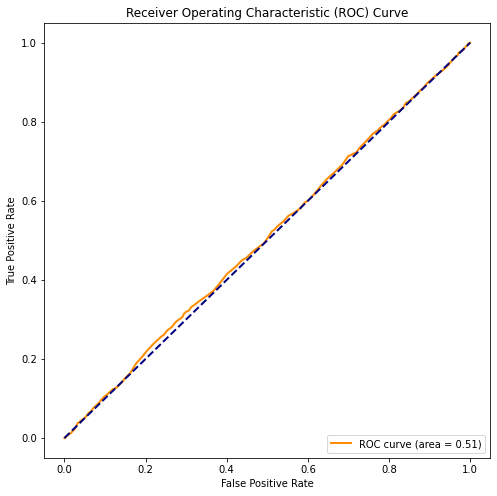

In [36]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# 顯示更多評估指標
print(classification_report(y_test, y_pred))

# 繪製ROC曲線
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

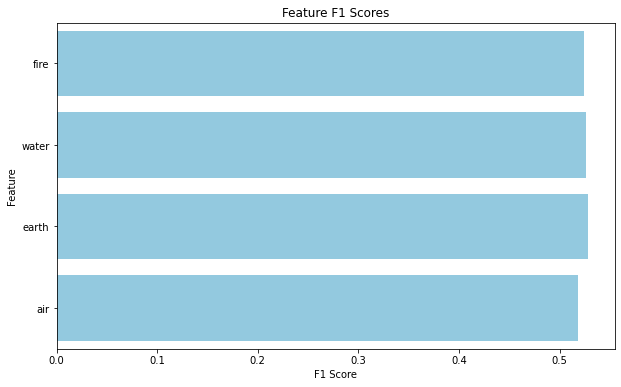

In [37]:
from sklearn.metrics import f1_score
import numpy as np


# F1分數
feature_f1_scores = []
for feature in features.columns:
    # 選擇特徵
    X_feature = X_test.copy()
    X_feature[feature] = np.random.permutation(X_feature[feature])
    
    # 預測
    y_pred_feature = model.predict(X_feature)
    
    # 算分數
    f1 = f1_score(y_test, y_pred_feature)
    
    feature_f1_scores.append(f1)

# 畫圖
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_f1_scores, y=features.columns, color='skyblue')
plt.title('Feature F1 Scores')
plt.xlabel('F1 Score')
plt.ylabel('Feature')
plt.show()